# 01 - Data Understanding: Pokemon QoE Dataset

## Objective
**WHY are we doing this analysis?**

This notebook focuses on understanding the Pokemon QoE (Quality of Experience) dataset, which contains subjective user experience ratings (MOS - Mean Opinion Score) for video streaming in mobile networks. The goal is to:

1. Understand what factors influence user's Quality of Experience
2. Identify patterns and relationships in the data
3. Prepare for predictive modeling to estimate QoE from objective metrics

**Context:**
- Dataset collected from crowdsourcing campaign with VLC media player
- 1560 samples from 181 testers watching videos on mobile networks
- Multiple QoE Influence Factors (IFs): Video quality, Network type, Device, User profile
- Target: MOS ratings (1=Bad to 5=Excellent)

---

## 1. Setup and Imports

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# For high-resolution plots (guideline requirement: DPI 300+)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Dataset

**WHY:** We need to load and perform initial inspection to understand the data structure and verify data integrity.

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/pokemon.csv')

print(f"Dataset shape: {df.shape[0]} samples, {df.shape[1]} features")
print("\n" + "="*80)
print("First 5 rows:")
df.head()

Dataset shape: 1543 samples, 23 features

First 5 rows:


,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,QoS_operator,QoD_model,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,4,2,HTC One X+,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,5,4,GT-I9195,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,2,2,GT-I9300,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,2,2,D5803,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,4,4,GT-I9300,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


## 3. Data Structure Analysis

**WHY:** Understanding data types and structure helps identify preprocessing needs and potential issues.

In [3]:
# Data types and missing values
print("Data Types and Missing Values:")
print("="*80)
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
info_df

Data Types and Missing Values:


,Data Type,Non-Null Count,Null Count,Null %
id,int64,1543,0,0.0
user_id,int64,1543,0,0.0
QoA_VLCresolution,int64,1543,0,0.0
QoA_VLCbitrate,float64,1543,0,0.0
QoA_VLCframerate,float64,1543,0,0.0
QoA_VLCdropped,int64,1543,0,0.0
QoA_VLCaudiorate,float64,1543,0,0.0
QoA_VLCaudioloss,int64,1543,0,0.0
QoA_BUFFERINGcount,int64,1543,0,0.0
QoA_BUFFERINGtime,int64,1543,0,0.0


### Expected vs Actual:
- **Expected:** According to documentation, no missing values
- **Actual:** [To be filled after running the cell above]
- **Analysis:** [Explain any discrepancies or confirm expectations]

## 4. Feature Categories

**WHY:** The dataset contains multiple categories of QoE Influence Factors. Understanding each category helps structure our analysis.

In [4]:
# Define feature categories based on documentation
feature_categories = {
    'Identifiers': ['id', 'user_id'],
    'QoA - Video Quality': [
        'QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
        'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
        'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime'
    ],
    'QoS - Network': ['QoS_type', 'QoS_operator'],
    'QoD - Device': ['QoD_model', 'QoD_os-version', 'QoD_api-level'],
    'QoU - User Profile': ['QoU_sex', 'QoU_age', 'QoU_Ustedy'],
    'QoF - User Feedback': ['QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video'],
    'Target': ['MOS']
}

# Display category summary
for category, features in feature_categories.items():
    print(f"\n{category}: {len(features)} features")
    for feat in features:
        if feat in df.columns:
            print(f"  ✓ {feat}")
        else:
            print(f"  ✗ {feat} (MISSING)")


Identifiers: 2 features
  ✓ id
  ✓ user_id

QoA - Video Quality: 8 features
  ✓ QoA_VLCresolution
  ✓ QoA_VLCbitrate
  ✓ QoA_VLCframerate
  ✓ QoA_VLCdropped
  ✓ QoA_VLCaudiorate
  ✓ QoA_VLCaudioloss
  ✓ QoA_BUFFERINGcount
  ✓ QoA_BUFFERINGtime

QoS - Network: 2 features
  ✓ QoS_type
  ✓ QoS_operator

QoD - Device: 3 features
  ✓ QoD_model
  ✓ QoD_os-version
  ✓ QoD_api-level

QoU - User Profile: 3 features
  ✓ QoU_sex
  ✓ QoU_age
  ✓ QoU_Ustedy

QoF - User Feedback: 4 features
  ✓ QoF_begin
  ✓ QoF_shift
  ✓ QoF_audio
  ✓ QoF_video

Target: 1 features
  ✓ MOS


## 5. Target Variable Analysis (MOS)

**WHY:** Understanding the target distribution is crucial for:
- Identifying class imbalance
- Determining appropriate evaluation metrics
- Deciding on modeling approach (classification vs regression)

In [5]:
# MOS distribution
mos_counts = df['MOS'].value_counts().sort_index()
mos_percentages = (mos_counts / len(df) * 100).round(1)

# Create DataFrame for better visualization
mos_summary = pd.DataFrame({
    'MOS Score': mos_counts.index,
    'Count': mos_counts.values,
    'Percentage': mos_percentages.values,
    'Label': ['Bad', 'Poor', 'Fair', 'Good', 'Excellent'][:len(mos_counts)]
})

print("MOS Distribution:")
print("="*80)
print(mos_summary.to_string(index=False))
print(f"\nTotal: {mos_counts.sum()} samples")

MOS Distribution:
 MOS Score  Count  Percentage     Label
         1     93         6.0       Bad
         2    118         7.6      Poor
         3    246        15.9      Fair
         4    784        50.8      Good
         5    302        19.6 Excellent

Total: 1543 samples


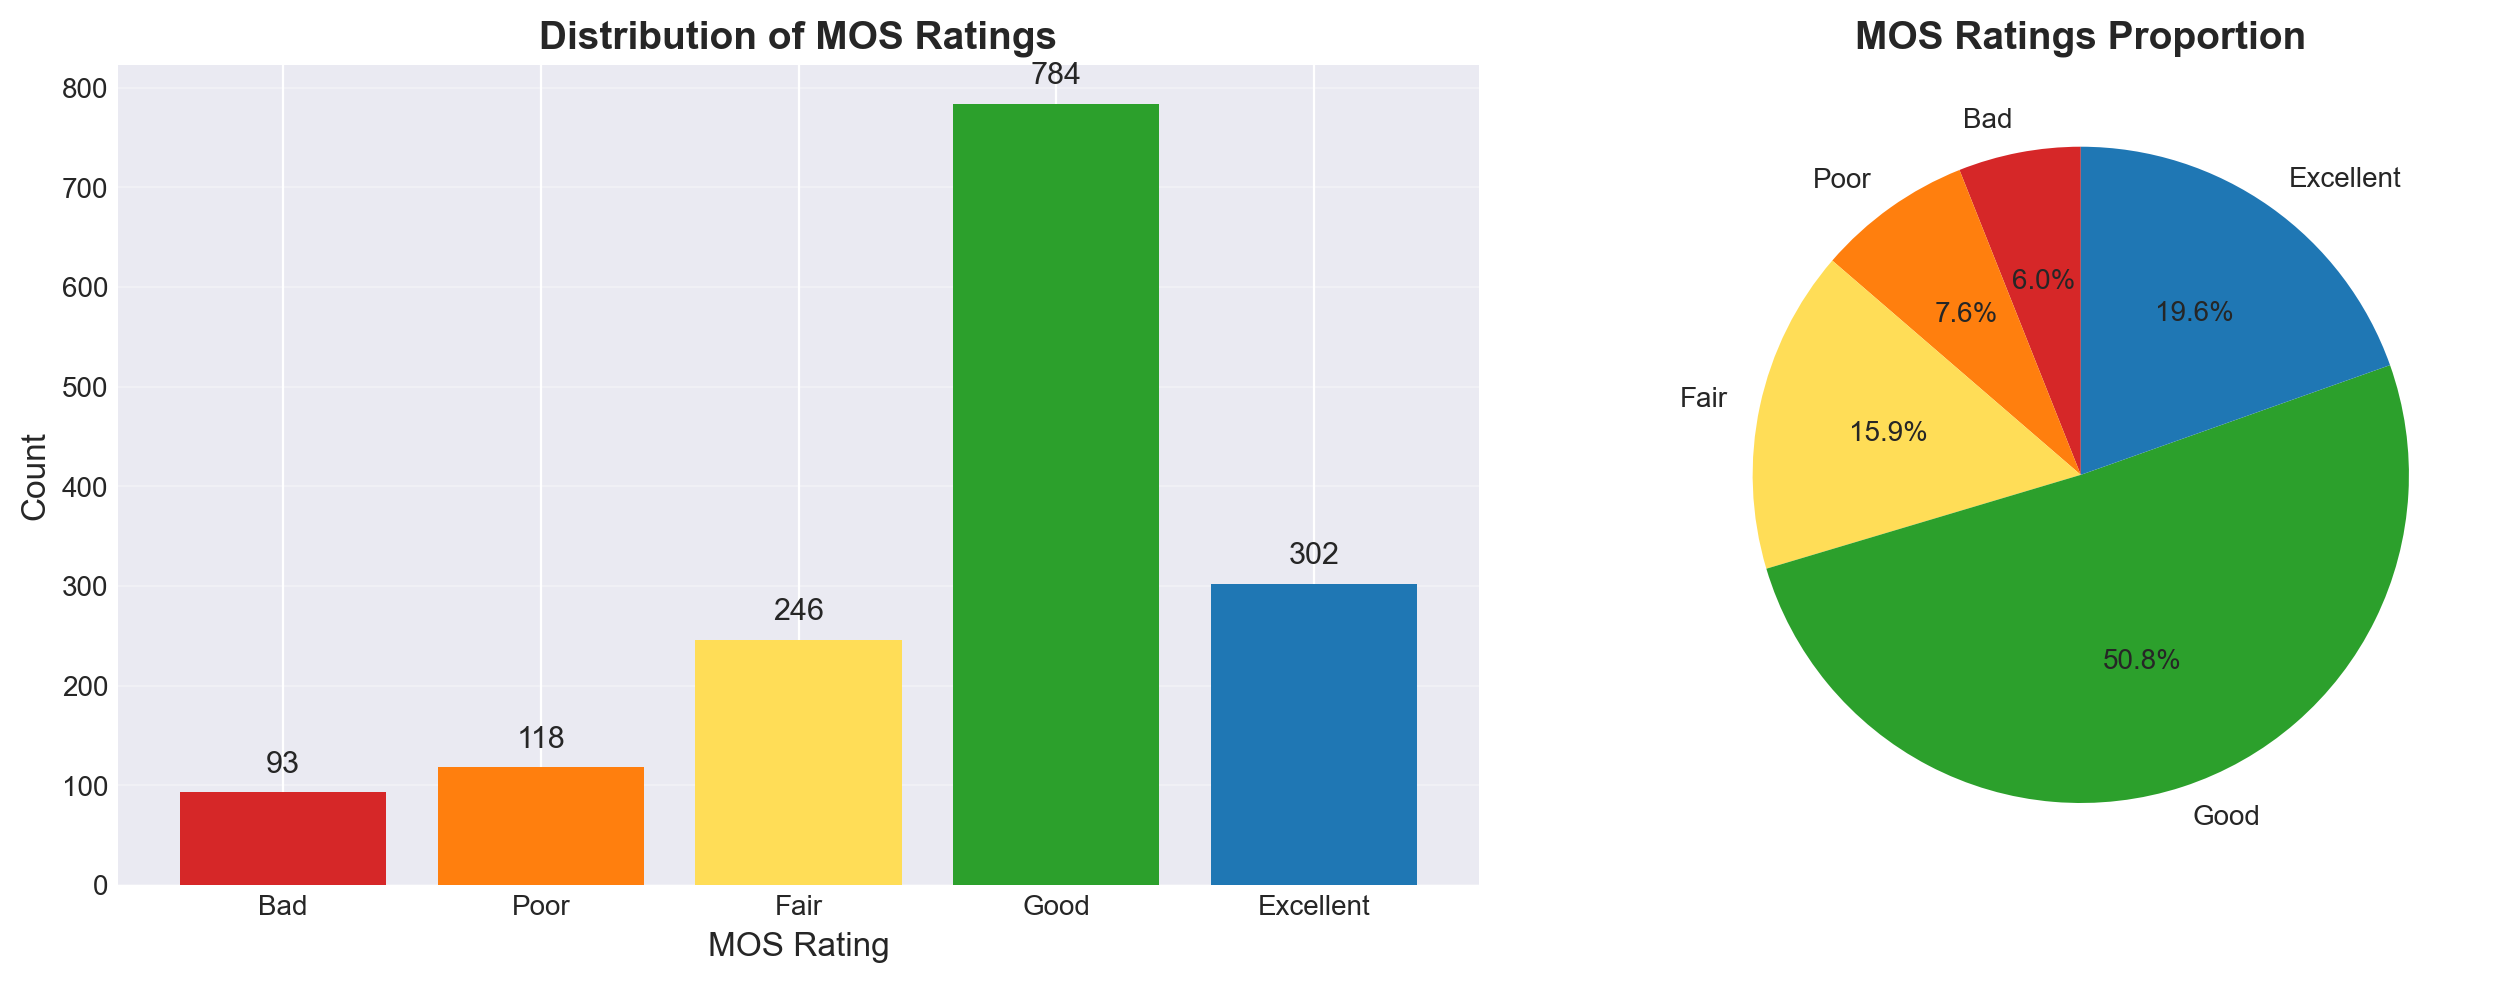

✓ Figure saved to ../results/figures/mos_distribution.png


In [6]:
# Visualize MOS distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = ['#d62728', '#ff7f0e', '#ffdd57', '#2ca02c', '#1f77b4']
axes[0].bar(mos_summary['Label'], mos_summary['Count'], color=colors)
axes[0].set_xlabel('MOS Rating', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of MOS Ratings', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (label, count) in enumerate(zip(mos_summary['Label'], mos_summary['Count'])):
    axes[0].text(i, count + 20, str(count), ha='center', fontsize=11)

# Pie chart
axes[1].pie(mos_summary['Count'], labels=mos_summary['Label'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('MOS Ratings Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/mos_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved to ../results/figures/mos_distribution.png")

### Expected vs Actual:
- **Expected (from documentation):**
  - Class 1: 92 samples
  - Class 2: 119 samples
  - Class 3: 244 samples
  - Class 4: 787 samples (majority)
  - Class 5: 300 samples
  
- **Actual:** [To be filled]

- **Analysis:**
  - Class imbalance present: MOS=4 dominates with ~50% of samples
  - Lower ratings (1, 2) are underrepresented
  - **Implication:** May need stratified sampling and class weighting in models

## 6. Numerical Features Analysis

**WHY:** Understanding numerical distributions helps identify:
- Outliers
- Scaling needs
- Potential transformations

In [7]:
# Select numerical features (excluding IDs)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['id', 'user_id', 'MOS']]

# Statistical summary
print("Numerical Features Statistics:")
print("="*80)
df[numerical_features].describe().T.round(2)

Numerical Features Statistics:


,count,mean,std,min,25%,50%,75%,max
QoA_VLCresolution,1543.0,354.57,25.94,16.0,360.00,360.00,360.00,360.00
QoA_VLCbitrate,1543.0,520.52,350.96,0.0,307.67,474.00,661.49,3918.29
QoA_VLCframerate,1543.0,25.00,6.69,0.0,24.73,25.32,29.80,31.32
QoA_VLCdropped,1543.0,1.22,5.62,0.0,0.00,0.00,1.00,107.00
QoA_VLCaudiorate,1543.0,40.38,9.12,0.0,43.78,44.15,44.47,46.00
QoA_VLCaudioloss,1543.0,0.24,1.13,0.0,0.00,0.00,0.00,14.00
QoA_BUFFERINGcount,1543.0,1.39,0.90,1.0,1.00,1.00,2.00,10.00
QoA_BUFFERINGtime,1543.0,6164.18,15032.23,683.0,2010.50,2719.00,4067.00,329271.00
QoS_type,1543.0,3.69,1.20,1.0,2.00,4.00,5.00,5.00
QoS_operator,1543.0,3.05,0.98,1.0,3.00,3.00,4.00,4.00


## 7. Categorical Features Analysis

**WHY:** Categorical features need special handling and understanding their cardinality informs encoding strategy.

In [8]:
# Identify categorical features
categorical_features = [
    'QoA_VLCresolution', 'QoS_type', 'QoS_operator',
    'QoD_model', 'QoD_os-version', 'QoU_sex', 'QoU_Ustedy'
]

print("Categorical Features Analysis:")
print("="*80)

for feat in categorical_features:
    if feat in df.columns:
        unique_count = df[feat].nunique()
        print(f"\n{feat}: {unique_count} unique values")
        value_counts = df[feat].value_counts()
        print(value_counts.head(10))  # Show top 10

Categorical Features Analysis:

QoA_VLCresolution: 3 unique values
QoA_VLCresolution
360    1475
240      67
16        1
Name: count, dtype: int64

QoS_type: 5 unique values
QoS_type
4    572
5    473
2    399
3     72
1     27
Name: count, dtype: int64

QoS_operator: 4 unique values
QoS_operator
3    654
4    581
1    194
2    114
Name: count, dtype: int64

QoD_model: 15 unique values
QoD_model
D5803           576
GT-I9195        338
GT-I9300        181
HTC One X+      159
SM-G900F        112
ARCHOS 101G9     55
Nexus 4          55
SM-N9005         37
HTC One_M8       24
GT-I9191          1
Name: count, dtype: int64

QoD_os-version: 18 unique values
QoD_os-version
4.4.4(suv3Rw)             577
4.4.2(I9195XXUCNK1)       278
4.1.1(122573.16)          159
4.1.2(I9300XXELL4)        123
4.4.2(G900FXXU1ANG2)       67
4.4.2(I9195XXUCNK4)        61
4.0.4(20130118.175432)     55
5.0.1(1602158)             44
4.4.2(N9005XXUGNI4)        37
5.1.1(456c49d1b2)          36
Name: count, dtype: int64


## 8. Key Insights Summary

**[To be filled after running analysis above]**

### Main Findings:
1. **Dataset Size:** [samples x features]
2. **Missing Values:** [Yes/No and details]
3. **Target Imbalance:** [Description]
4. **Feature Types:** [Numerical vs Categorical split]

### Critical Assessment:
- **Limitations Identified:**
  - [List any data quality issues]
  - [High cardinality features]
  - [Class imbalance concerns]

### Next Steps:
1. Preprocessing strategy based on findings
2. Feature engineering opportunities
3. Handling class imbalance